In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
!pip install scikit-plot
import scikitplot as skplt
!pip install reverse_geocoder
import reverse_geocoder as rg

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [6]:
data.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


No object column is there in the dataset

In [8]:
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [10]:
import pprint
data00=[]
def reverseGeocode(coordinates):
  result=rg.search(coordinates)
  return (result)
if __name__=="__main__":
  coordinates=list(zip(data['lat'],data['lon']))
  data12=reverseGeocode(coordinates)
  data00.append(data12)

new_data=pd.DataFrame(data00).transpose()

Loading formatted geocoded file...


ALL THE LATITUDES & LONGITUDES HAS BEEN CONERTED INTO THE CITY & STATE.

# Feature Engineering

In [11]:
data['state']=new_data[0].apply(lambda x:x.get('admin1'))

data['City']=new_data[0].apply(lambda x:x.get('name'))

In [12]:
data.drop(['lat','lon'],axis=1,inplace=True)

DROPPED LATITUDE & LONGITUDE COLUMN

In [13]:
data['Date']=pd.to_datetime(data['Date'])
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day

DATE IS BEING CONVERTED IN YEAR-MONTH-DATE.

In [14]:
data.drop(['Date'],axis=1,inplace=True)

DROPPED DATE COLUMN

In [15]:
{column:len(data[column].unique()) for column in data.columns if data[column].dtypes=='float64'}

{'station': 26,
 'Present_Tmax': 168,
 'Present_Tmin': 156,
 'LDAPS_RHmin': 7673,
 'LDAPS_RHmax': 7665,
 'LDAPS_Tmax_lapse': 7676,
 'LDAPS_Tmin_lapse': 7676,
 'LDAPS_WS': 7676,
 'LDAPS_LH': 7676,
 'LDAPS_CC1': 7570,
 'LDAPS_CC2': 7583,
 'LDAPS_CC3': 7600,
 'LDAPS_CC4': 7525,
 'LDAPS_PPT1': 2813,
 'LDAPS_PPT2': 2511,
 'LDAPS_PPT3': 2357,
 'LDAPS_PPT4': 1919,
 'DEM': 25,
 'Slope': 27,
 'Solar radiation': 1575,
 'Next_Tmax': 184,
 'Next_Tmin': 158,
 'Year': 6,
 'Month': 13,
 'Day': 22}

CHECKING UNIQUE VALUES FOR COLUMNS.

In [16]:
col=['DEM','Day','Month','Slope','Year','station']

# Univariate Analysis

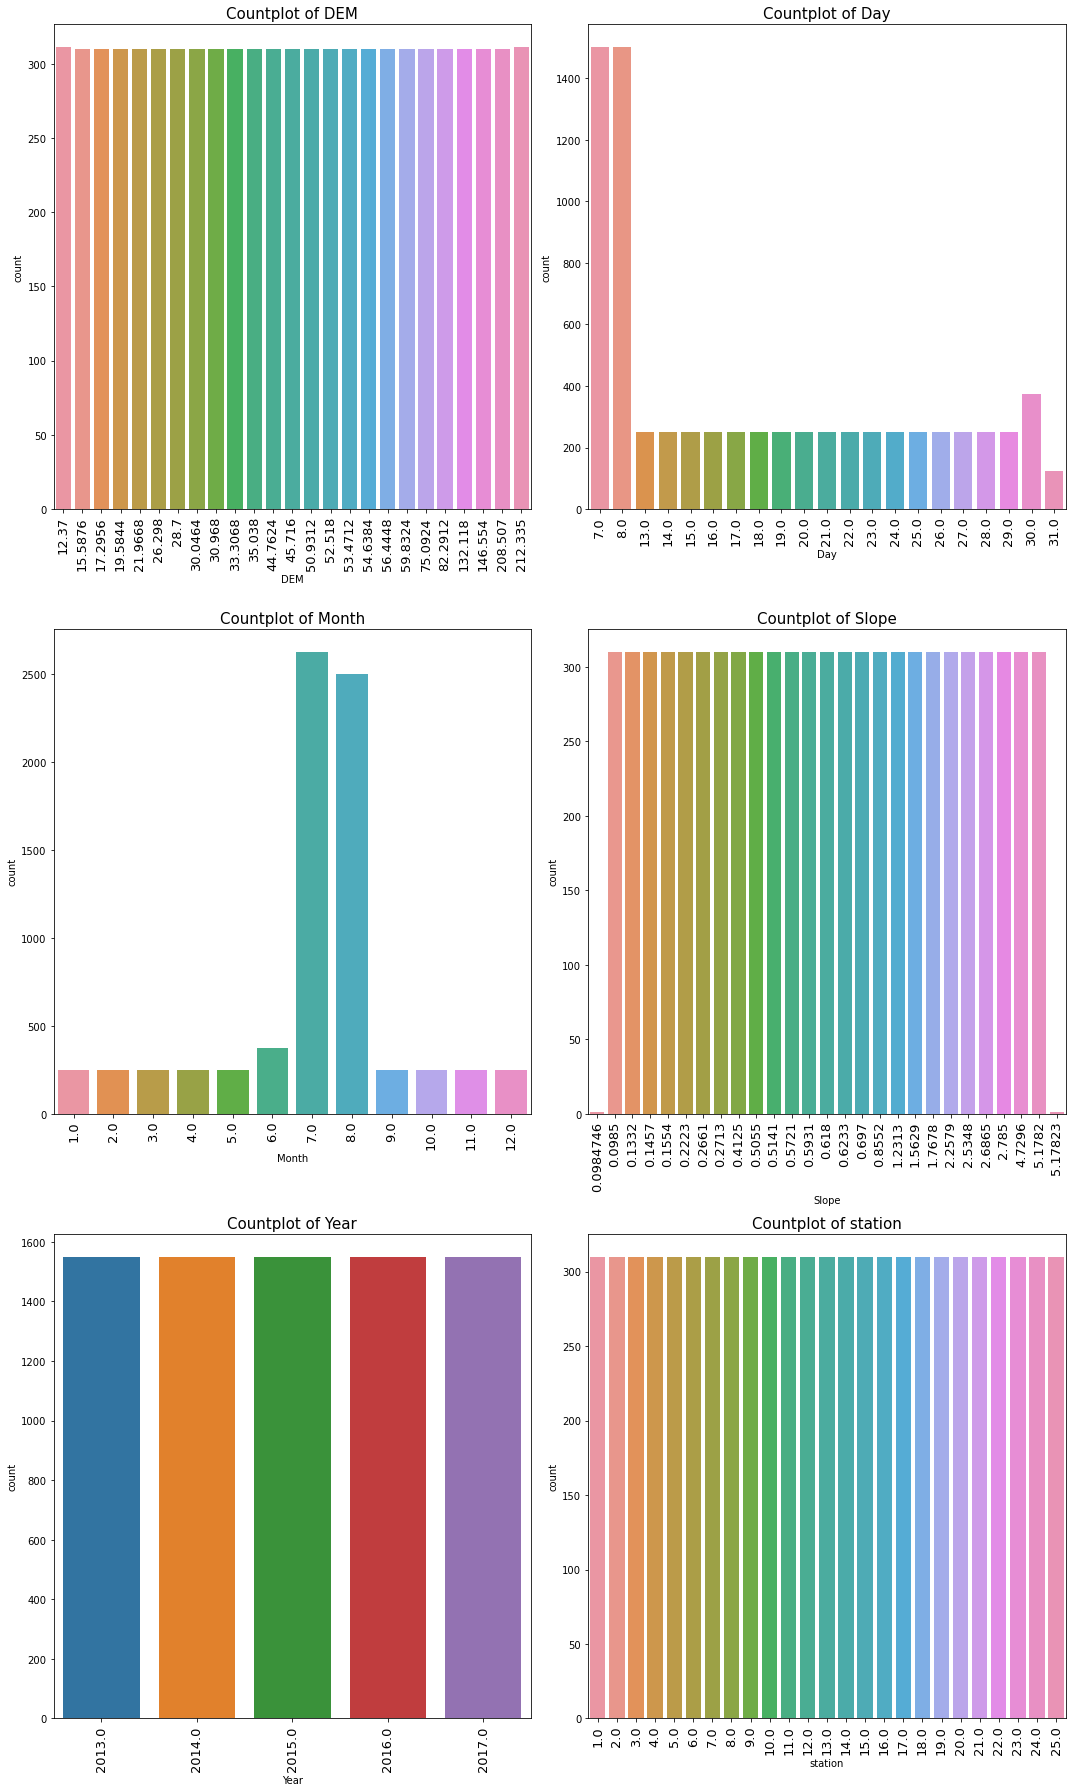

In [17]:
plt.figure(figsize=(15,25))
for i in range(len(col)):
  plt.subplot(3,2,i+1)
  sns.countplot(data[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=15)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout()

1.FROM COUNTPLOT OF DAY WE GET TO KNOW THAT 7TH & 8TH DAY OF EVERY MONTH HAS HIGHER COUNT COMPARED TO OTHER DATES.

2.FROM COUNTPLOT OF MONTH WE GET TO KNOW THAT 7TH & 8TH MONTH HAS HIGHER COUNT COMPARED TO OTHER MONTHS.

3.ALL THE OTHER COUNTPLOTS ARE SHOWING UNIFORM DISTRIBUTION.

In [18]:
data.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'state', 'City', 'Year',
       'Month', 'Day'],
      dtype='object')

In [19]:
col1=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']

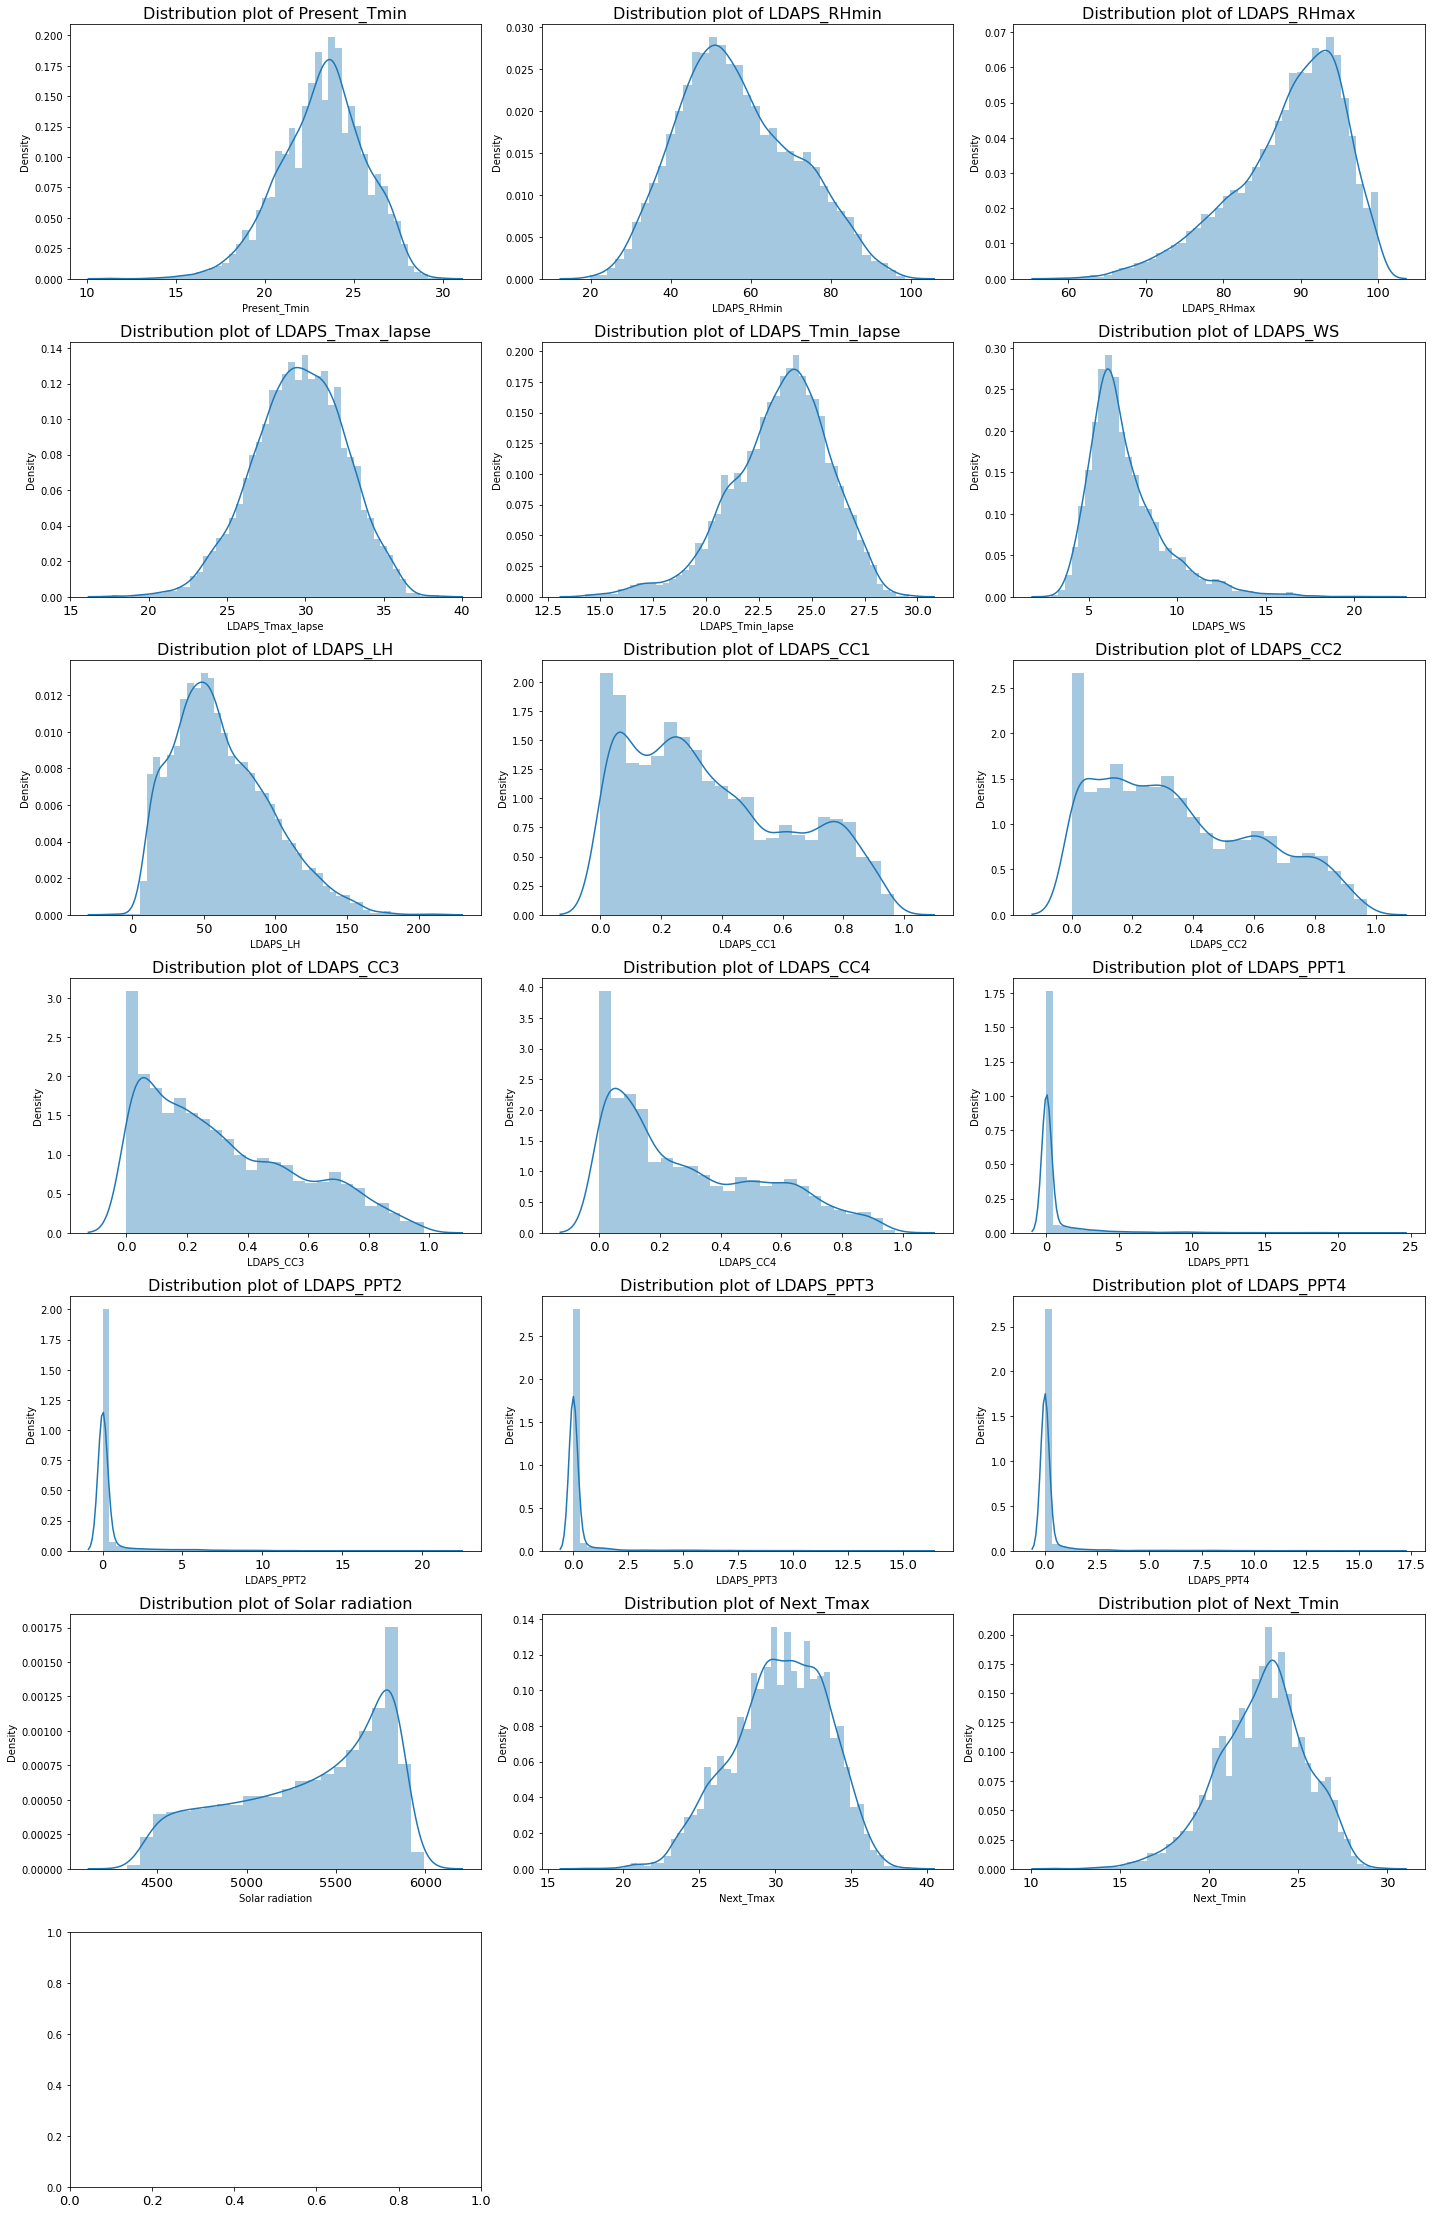

In [20]:
plt.figure(figsize=(20,35))
for i in range(len(col1)):
  sns.distplot(data[col1[i]])
  plt.title(f"Distribution plot of {col1[i]}",fontsize=16)
  plt.subplot(8,3,i+1)
  plt.xticks(fontsize=13)
  plt.tight_layout()

1-From Minimum air temperature somewhere in the range of 0 and 21 h on the current day (Â°C):i can say it is left slanted and the scope of it is between 11.3 to 29.9 however generally esteem lies between 17 to 29 

2-From LDAPS model conjecture of following day least relative dampness (%):i can say it has a little right pinnacle its worth is between 19.8 to 98.5 

3-From LDAPS model gauge of following day greatest relative mugginess (%): I can say it is completely left slanted and its worth is between 58.9 to 100 yet in information its generally range between 75-100 

4-From LDAPS model figure of following day greatest air temperature applied slip by rate (Â°C): I can say it is minimal left slanted however noramlly appropriated its worth reach is between 17.6 to 38.5 yet in information the greater part of the esteemed lies between 25-35 

5-From LDAPS model estimate of following day least air temperature applied slip by rate (Â°C): I can say it is left slanted and its worth reach is between 14.3 to 29.6 yet in information the greater part of the qualities lies between 20-27.5 

6-From LDAPS model figure of following day normal breeze speed (m/s):i can say it is correct slanted and its worth reach is between 2.9 to 21.9 yet generally values in information lies in 4-10 

7-From LDAPS model figure of following day normal inactive warmth transition (W/m2):i can say it is correct slanted and its worth reach is between - 13.6 to 213.4 however a large portion of the qualities lies between 0-125

8-LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
From above all the columns i can say all four column are right skewed and having middle peak also

9-LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
From there four features i can say these all are having right peak only

10-Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T
all these three columns are right skewed.

# Bivariate Analysis

In [22]:
data1=data.groupby('City')[['Next_Tmax','Next_Tmin']].max()
data1=data1.reset_index()
data1=data1.sort_values(by=('Next_Tmax'),ascending=False)
data2=data.groupby('City')[['Next_Tmax','Next_Tmin']].max()
data2=data2.reset_index()
data2=data2.sort_values(by=('Next_Tmin'),ascending=True)

Text(0.5, 1.0, 'City wise minimum temperature')

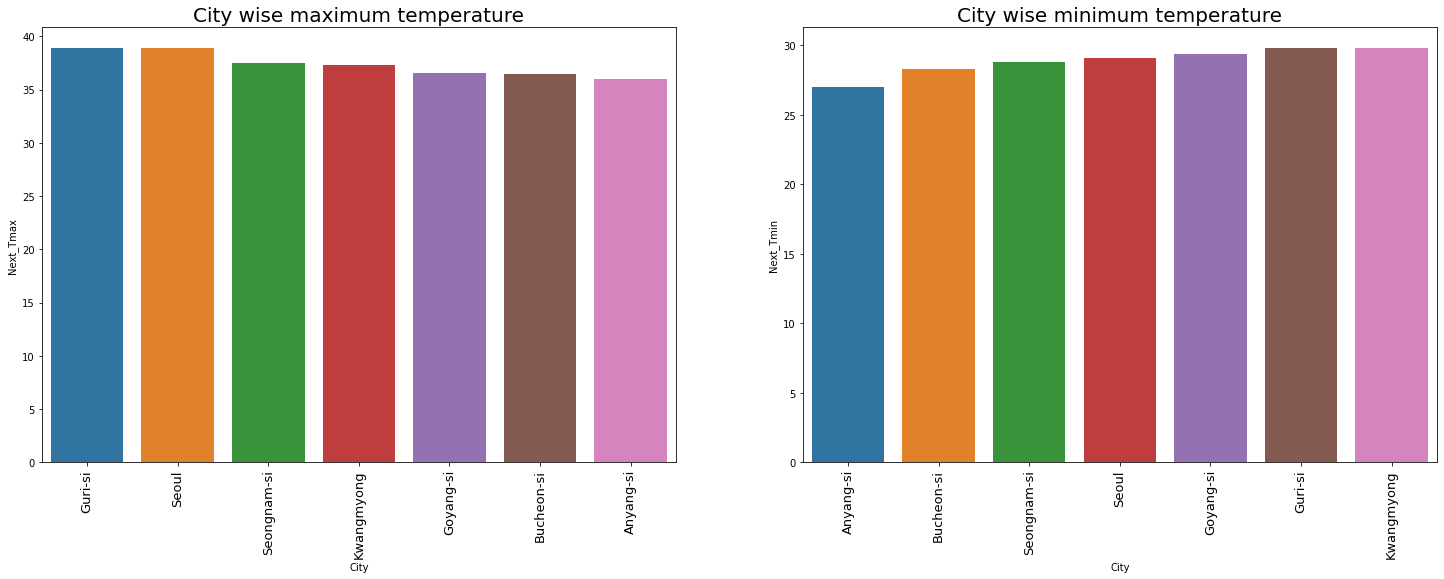

In [23]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.barplot(x=data1['City'],y=data1['Next_Tmax'])
plt.xticks(rotation=90,fontsize=13)
plt.title("City wise maximum temperature",fontsize=20)
plt.subplot(1,2,2)
sns.barplot(x=data2['City'],y=data2['Next_Tmin'])
plt.xticks(rotation=90,fontsize=13)
plt.title("City wise minimum temperature",fontsize=20)

1.From City wise maximum temperature I can say guri-si and seoul has the highest temperature compare to other.

2..From City wise minimum temperature I can aryang-si and bucheon-si has low temperatue compare to other.

In [24]:
data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,state,City,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,212.3350,2.7850,5992.895996,29.1,21.2,Seoul,Seoul,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,44.7624,0.5141,5869.312500,30.5,22.5,Seoul,Seoul,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,33.3068,0.2661,5863.555664,31.1,23.9,Seoul,Seoul,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,45.7160,2.5348,5856.964844,31.7,24.3,Seoul,Seoul,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,35.0380,0.5055,5859.552246,31.2,22.5,Gyeonggi-do,Guri-si,2013.0,6.0,30.0


In [26]:
data3=data.groupby('state')[['Next_Tmax','Next_Tmin']].max()
data3=data3.reset_index()
data4=data.groupby('state')[['Next_Tmax','Next_Tmin']].min()
data4=data4.reset_index()

Text(0.5, 1.0, 'state wise minimum temperature')

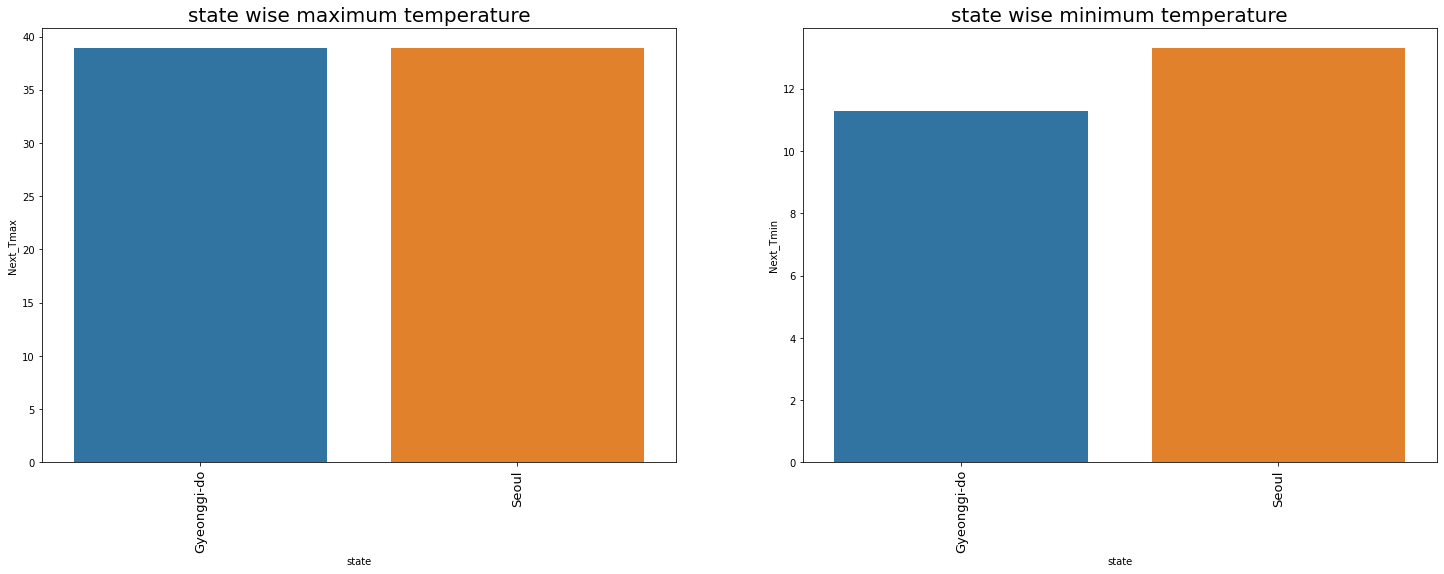

In [27]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.barplot(x=data3['state'],y=data3['Next_Tmax'])
plt.xticks(rotation=90,fontsize=13)
plt.title("state wise maximum temperature",fontsize=20)
plt.subplot(1,2,2)
sns.barplot(x=data4['state'],y=data4['Next_Tmin'])
plt.xticks(rotation=90,fontsize=13)
plt.title("state wise minimum temperature",fontsize=20)

1.From state wise maximum temperature I can predict that maximum temperature is around 39.

2.From state wise minimum temperature I can predict that minimum temperature is around 11.5.

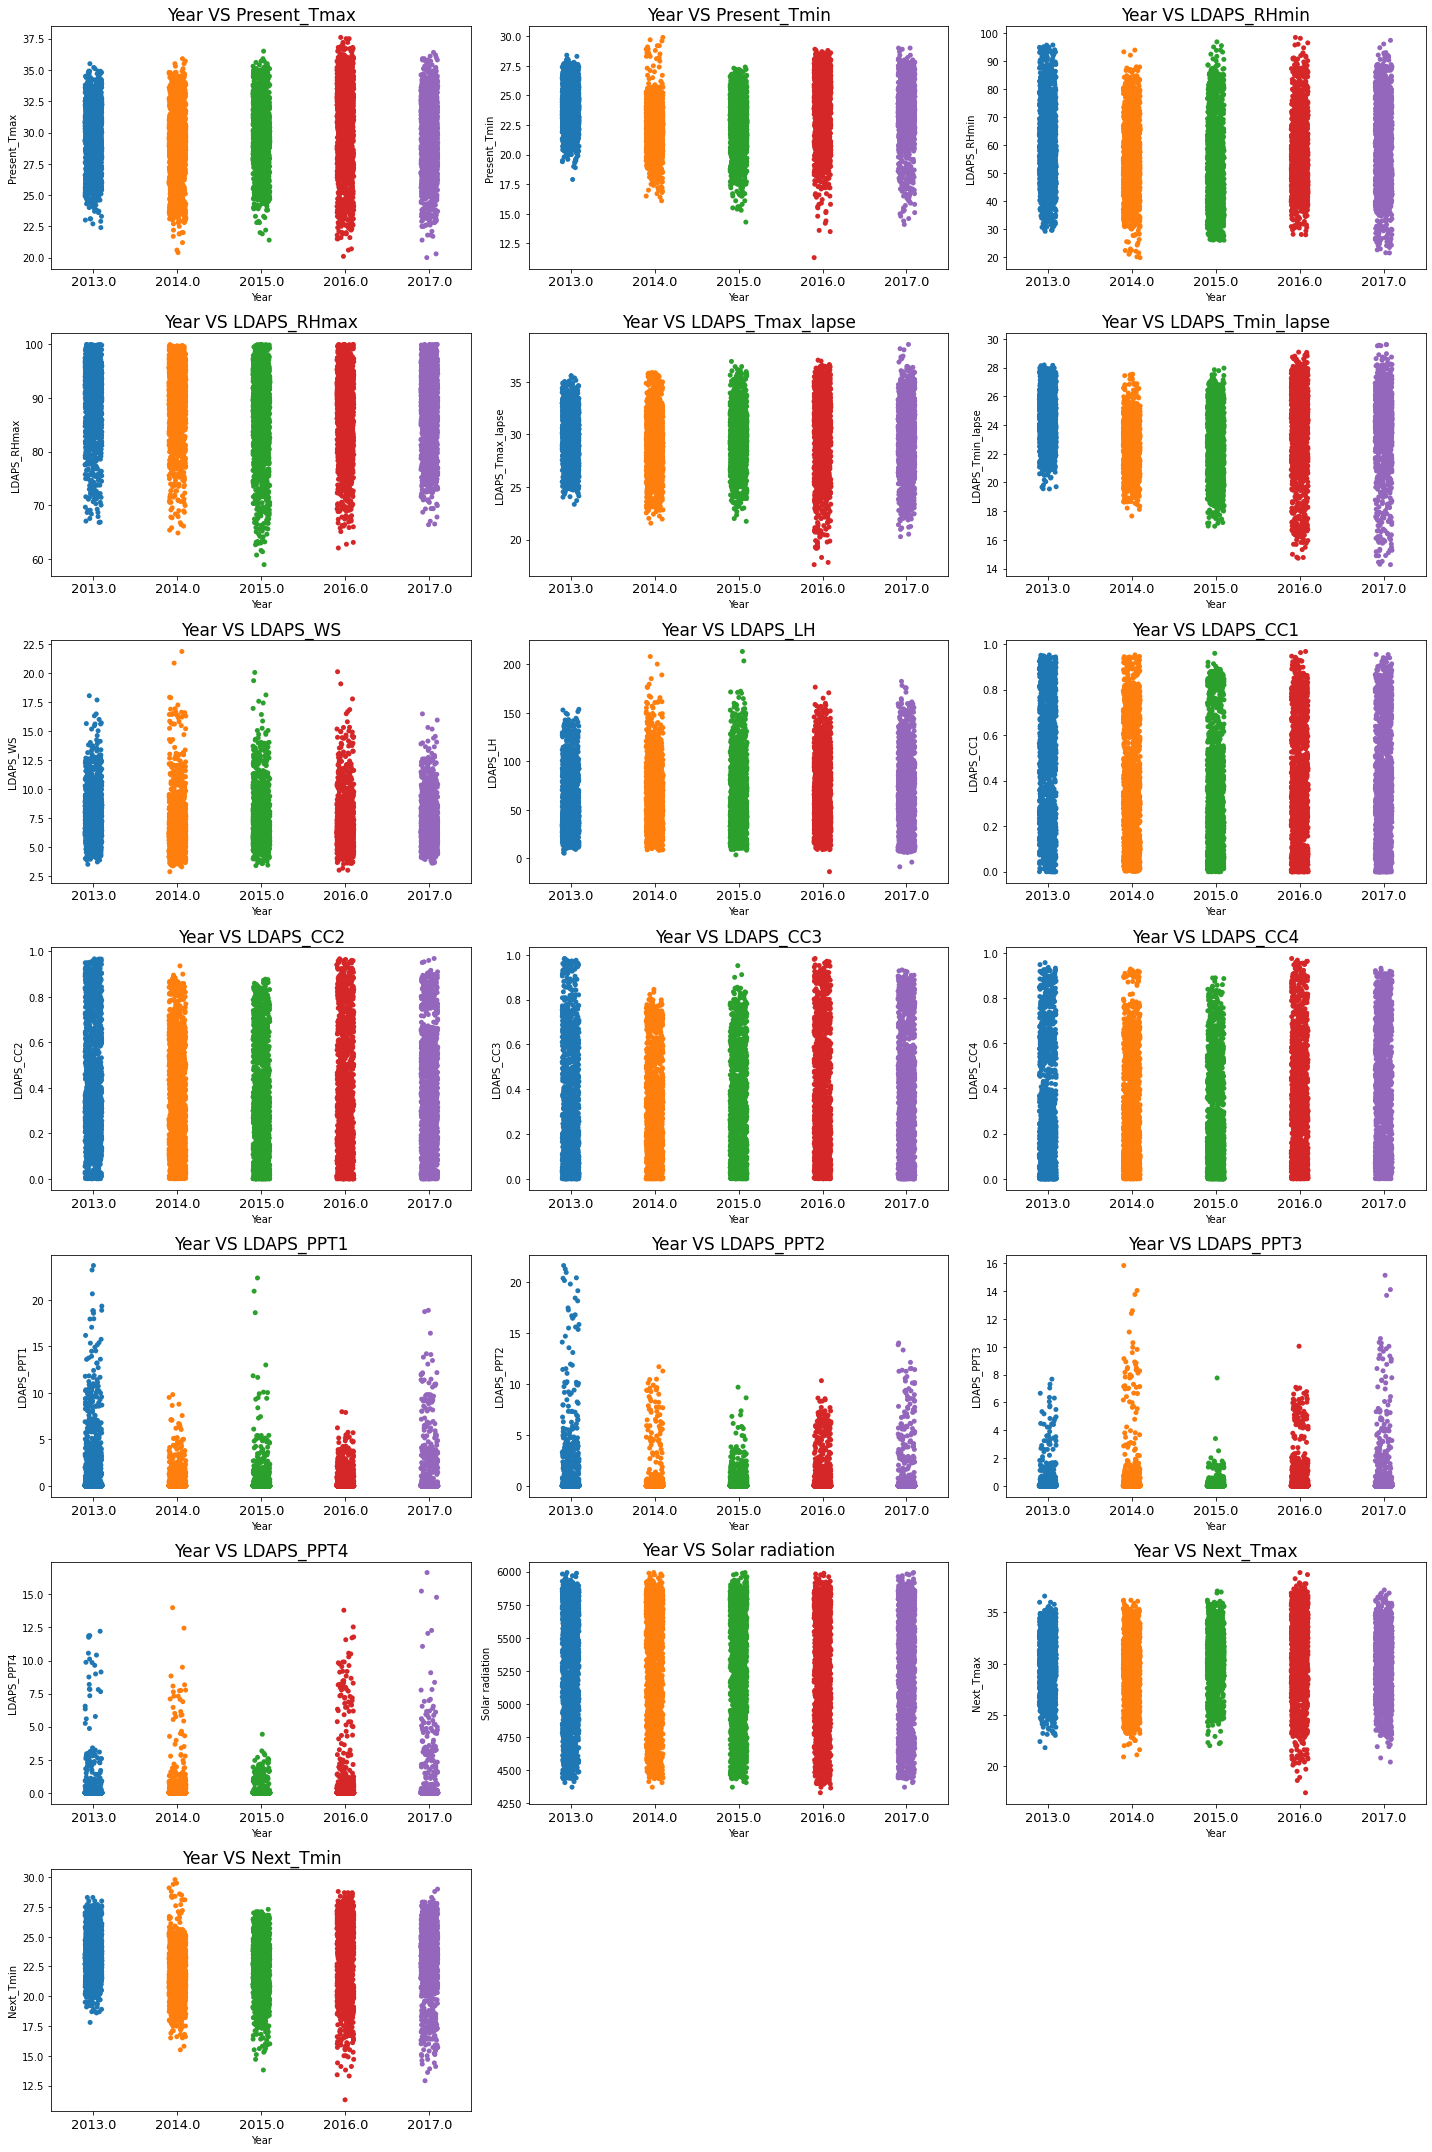

In [28]:
plt.figure(figsize=(20,30))
for i in range(len(col1)):
  plt.subplot(7,3,i+1)
  sns.stripplot(x=data['Year'],y=data[col1[i]])
  plt.title(f"Year VS {col1[i]}",fontsize=17)
  plt.xticks(fontsize=13)
  plt.tight_layout()

1-From Year versus Maximum air temperature somewhere in the range of 0 and 21 h on the current day I can say 2016 has the most noteworthy temperature.

2-From year versus Minimum air temperature somewhere in the range of 0 and 21 h on the current day (Â°C): 11.3 to 29.9 I can say 2017 and 2016 has the minimum temperature. 

3-From year versus LDAPS model conjecture of following day least relative humidity (%): 19.8 to 98.5 I can say 2014 and 2017 has the minimum humidity. 

4-From Year versus LDAPS model conjecture of following day greatest relative humidity (%): 58.9 to 100 I can say all year has same count. 

5-From Year versus LDAPS model gauge of following day most extreme air temperature applied pass rate (Â°C): 17.6 to 38.5 I can say 2016 and 2017 has the most elevated pass rate. 

6-From year versus LDAPS model estimate of following day least air temperature applied slip by rate (Â°C): 14.3 to 29.6 I can say least air temperature was in 2016 and 2017. 

7-From year versus LDAPS model conjecture of following day normal breeze speed (m/s): 2.9 to 21.9 and LDAPS model figure of following day normal inert warmth motion (W/m2): - 13.6 to 213.4 has the most noteworthy worth in 2014 and 2015. 

8-From Year versus LDAPS model conjecture of following day first 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97 I can say greatest value was on 2013 and 2014.

9-From year versus LDAPS model figure of following day second 6-hour split average cloud coverr (6-11 h) (%): 0 to 0.97 the most extreme worth was on long term. 

10-From year versus LDAPS model gauge of following day third 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98 I can say max esteem was in 2013 and 2016. 

11-from year versus LDAPS model gauge of following day fourth 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97 has the maximum worth on 2013 and 2016. 

12-From year versus LDAPS model gauge of following day first 6-hour split average precipitation (0-5 h) (%): 0 to 23.7 I can say 2013 and 2017 has the highest count. 

13-From year versus LDAPS model gauge of following day second 6-hour split average precipitation (6-11 h) (%): 0 to 21.6 I can say 2013 and 2017 has the highest count. 

14-From year versus LDAPS model gauge of following day third 6-hour split average precipitation (12-17 h) (%): 0 to 15.8 I can say 2014 and 2017 has the highest count. 

15-From year versus LDAPS model estimate of following day fourth 6-hour split average precipitation (18-23 h) (%): 0 to 16.7 I can say 2016 and 2017 has the highest count.

In [29]:
col2=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']

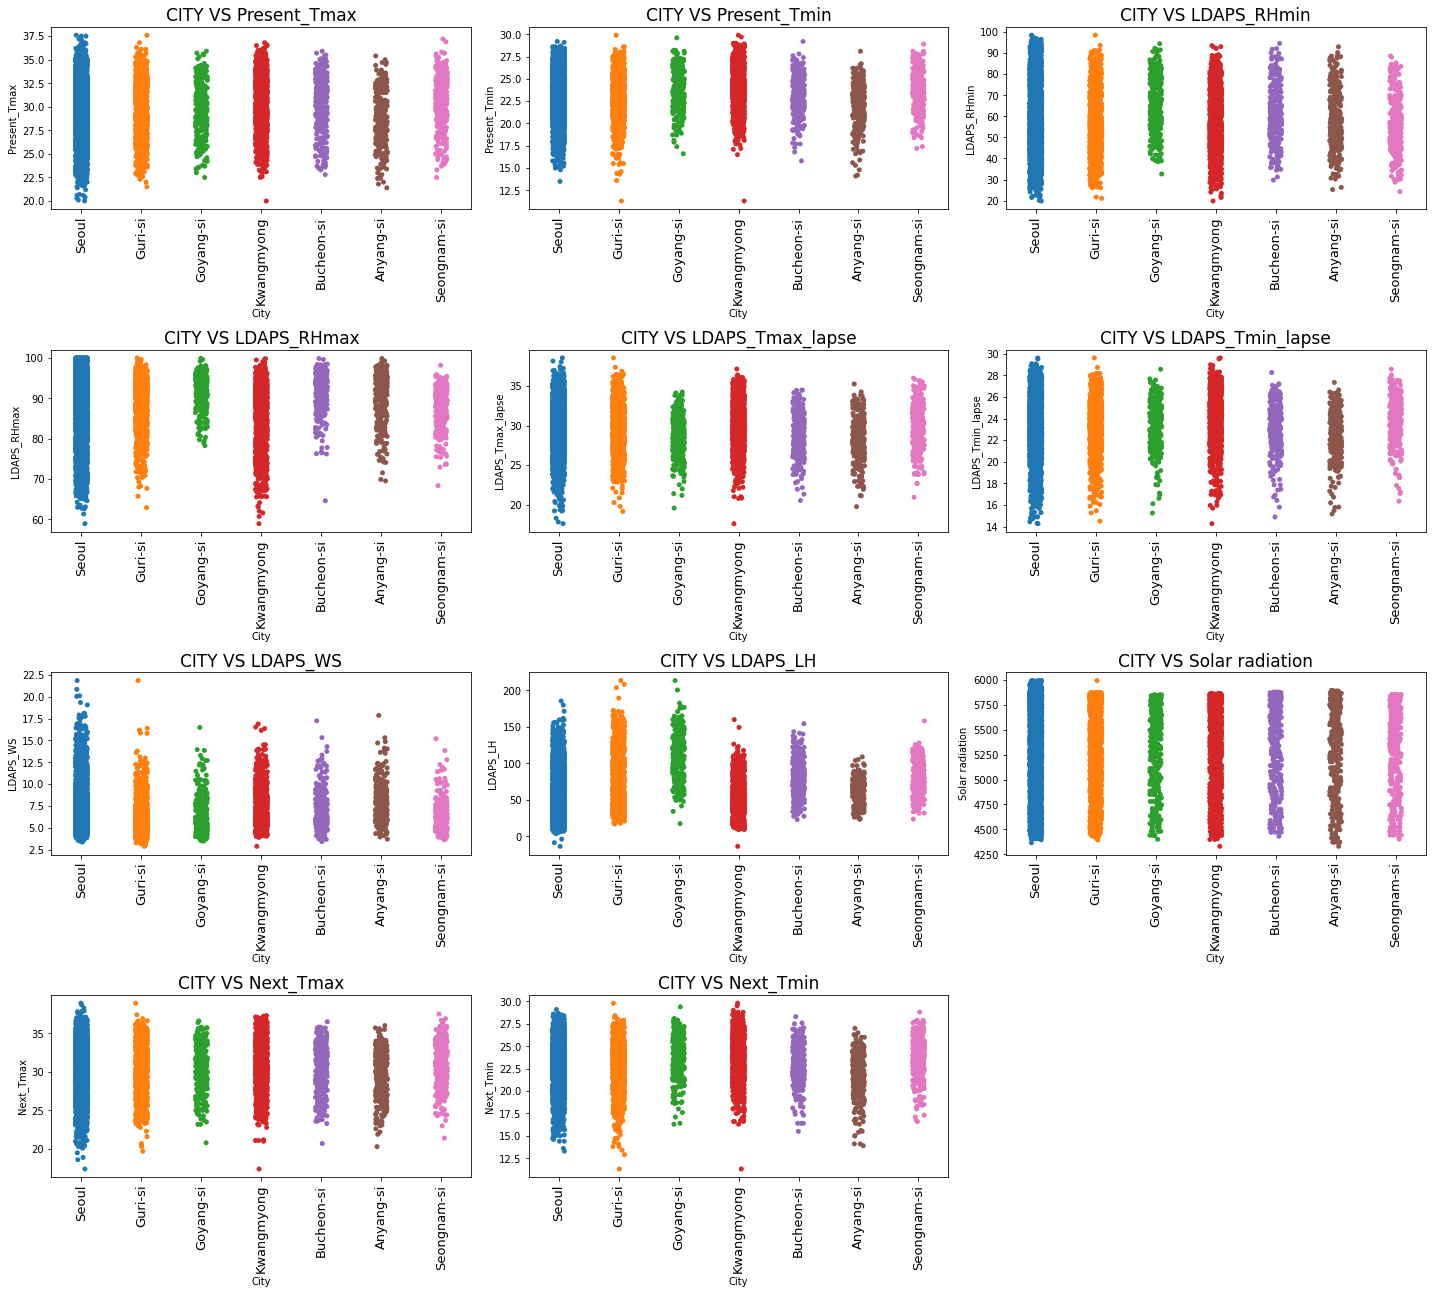

In [30]:
plt.figure(figsize=(20,30))
for i in range(len(col2)):
  plt.subplot(7,3,i+1)
  sns.stripplot(x=data['City'],y=data[col2[i]])
  plt.title(f"CITY VS {col2[i]}",fontsize=17)
  plt.xticks(fontsize=13,rotation=90)
  plt.tight_layout()

1-From City vs present tmax seoul and guri-si has the maximum temperature.

2-From City vs tmin Seoul and guri-si has the minimum temp.

3-From city vs LDAPS model forecast of next-day minimum and maximum relative humidity i can say seoul and kwangmtong has the min temperature as well as maximum temperature.

4-From city vs LDAPS model forecast of next-day maximum air temperature applied lapse rate i can say that seoul and guri-si has the minimum and maximum values.

5-From city vs LDAPS model forecast of next-day average wind speed i can say swoul and guri-si has the maximum value.

6-From city vs LDAPS model forecast of next-day average latent heat flux i can say that guri-si and goyang-si.

7-From City vs solar radiation i can say seoul has the highest rate.

8-From upper graph guri-si and seoul has the highest temperature as comapre to other but rest of them also count as highest temperature city.

9-From minimum temperature city i can say aryang-si and bucheon-si has low temperatue but rest of all column have less temperature and all but these two have very less as compare to other.

# Data Preprocessing

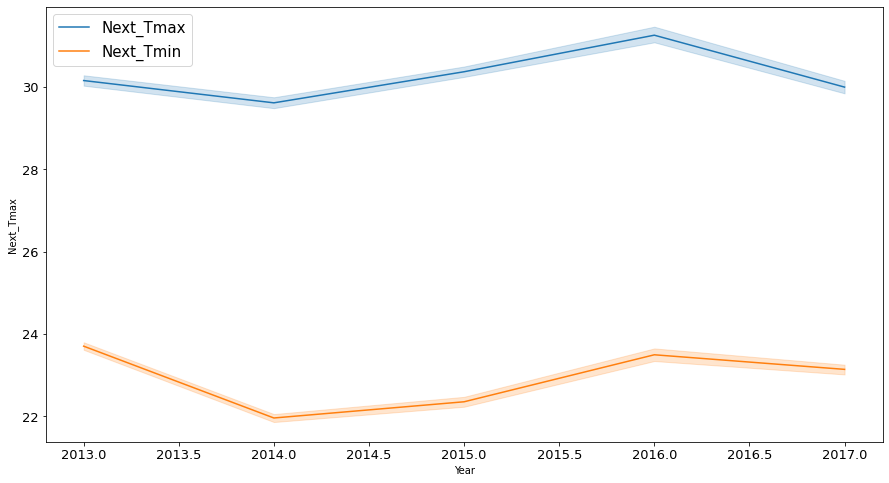

In [32]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Next_Tmax',data=data)
sns.lineplot(x='Year',y='Next_Tmin',data=data)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['Next_Tmax','Next_Tmin'],fontsize=15)
plt.show()

In 2016 tmax was highest &  in 2014 tmin was minimum.

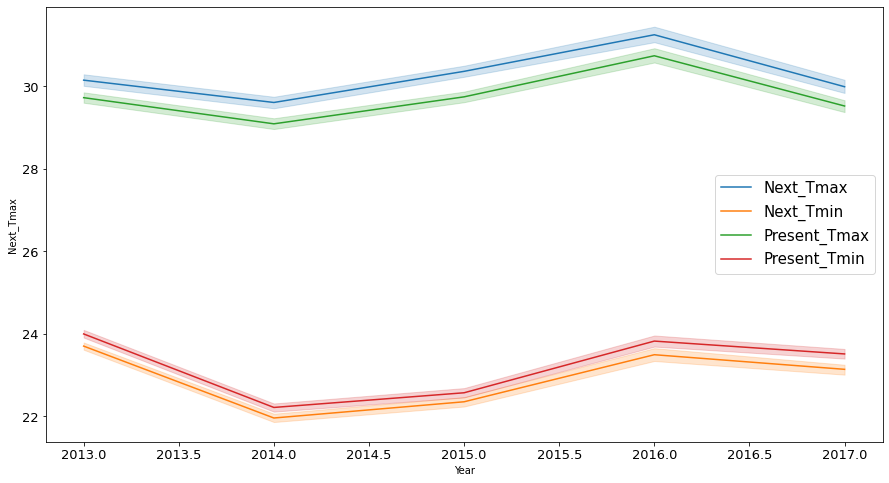

In [33]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Next_Tmax',data=data)
sns.lineplot(x='Year',y='Next_Tmin',data=data)
sns.lineplot(y='Present_Tmax',x='Year',data=data)
sns.lineplot(y='Present_Tmin',x='Year',data=data)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['Next_Tmax','Next_Tmin','Present_Tmax','Present_Tmin'],fontsize=15)
plt.show()

1. next day temperature is higher than present day.(max temp)
2. next day temperature is lower than present day.(min temp)

In [34]:
data

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,state,City,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,212.3350,2.785000,5992.895996,29.1,21.2,Seoul,Seoul,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,44.7624,0.514100,5869.312500,30.5,22.5,Seoul,Seoul,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,33.3068,0.266100,5863.555664,31.1,23.9,Seoul,Seoul,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,45.7160,2.534800,5856.964844,31.7,24.3,Seoul,Seoul,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,35.0380,0.505500,5859.552246,31.2,22.5,Gyeonggi-do,Guri-si,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,15.5876,0.155400,4443.313965,28.3,18.1,Gyeonggi-do,Kwangmyong,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,17.2956,0.222300,4438.373535,28.6,18.8,Gyeonggi-do,Kwangmyong,2017.0,8.0,30.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,19.5844,0.271300,4451.345215,27.8,17.4,Seoul,Seoul,2017.0,8.0,30.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,12.3700,0.098475,4329.520508,17.4,11.3,Gyeonggi-do,Kwangmyong,NaN,NaN,NaN


In [35]:
data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,state,City,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,212.3350,2.7850,5992.895996,29.1,21.2,Seoul,Seoul,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,44.7624,0.5141,5869.312500,30.5,22.5,Seoul,Seoul,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,33.3068,0.2661,5863.555664,31.1,23.9,Seoul,Seoul,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,45.7160,2.5348,5856.964844,31.7,24.3,Seoul,Seoul,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,35.0380,0.5055,5859.552246,31.2,22.5,Gyeonggi-do,Guri-si,2013.0,6.0,30.0


In [36]:
data.isna().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
state                0
City                 0
Year                 2
Month                2
Day                  2
dtype: int64

# TRANSFORMATION

In [37]:
oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df=df.copy()
  df[column]=oe.fit_transform(df[column])
  return df

In [38]:
data=ordinal_encoder(data,['City','state'])

# DATA PREPROCESSING

In [39]:
def preprocess(df):
  df=df.copy()
  for column in ['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Next_Tmax','Next_Tmin']:
    df[column]=df[column].fillna(df[column].mean())
  for column in ['Year','Month','Day','station']:
    df[column]=df[column].fillna(df[column].mode()[0])
  X=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
  y=df[['Next_Tmax','Next_Tmin']]
  return X,y

In [40]:
X,y=preprocess(data)

SPLITTING DATA INTO X & Y.

In [41]:
x=X

<AxesSubplot:>

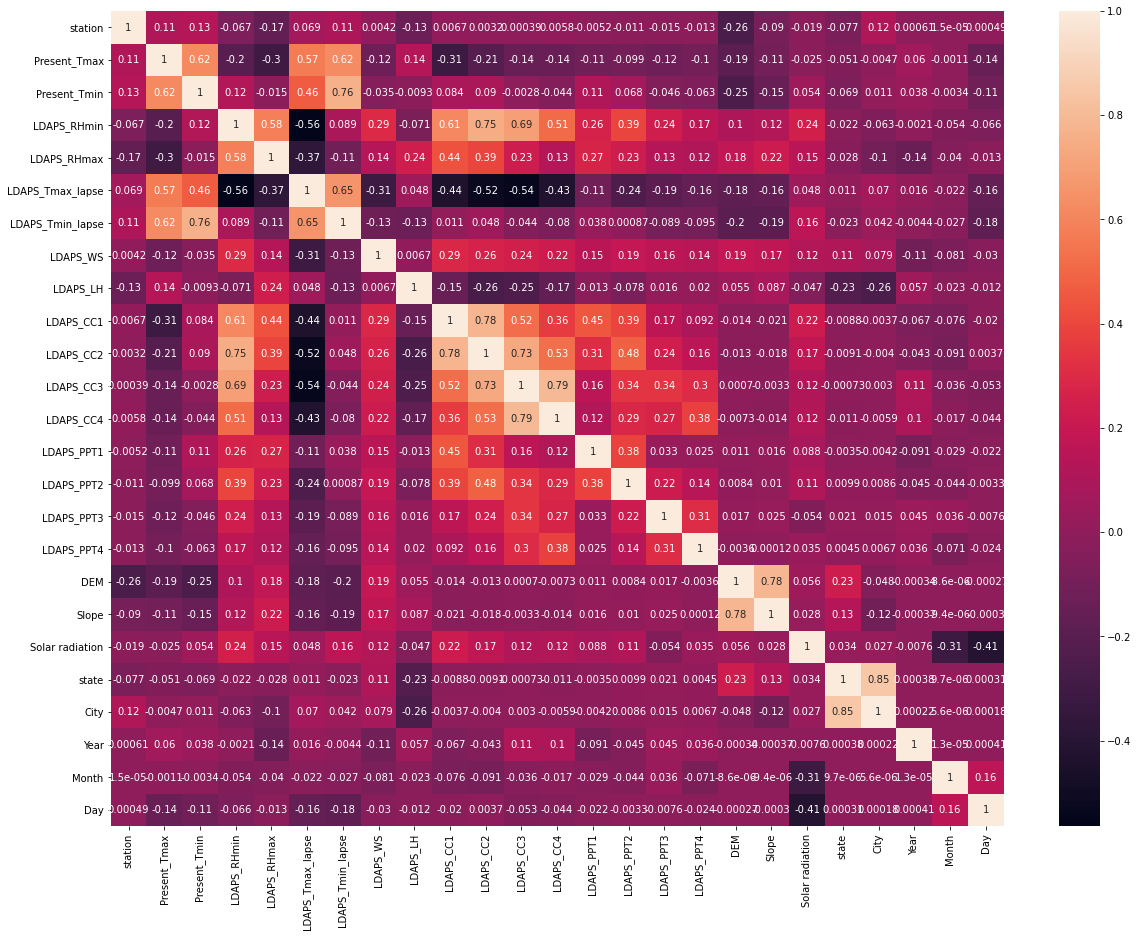

In [42]:
X_corr=X.corr()
plt.figure(figsize=(20,15))
sns.heatmap(X_corr,annot=True)

Many columns have good correlation.

No need to apply pca and no need to drop any column as no column has any high correlation.

# OUTLERS

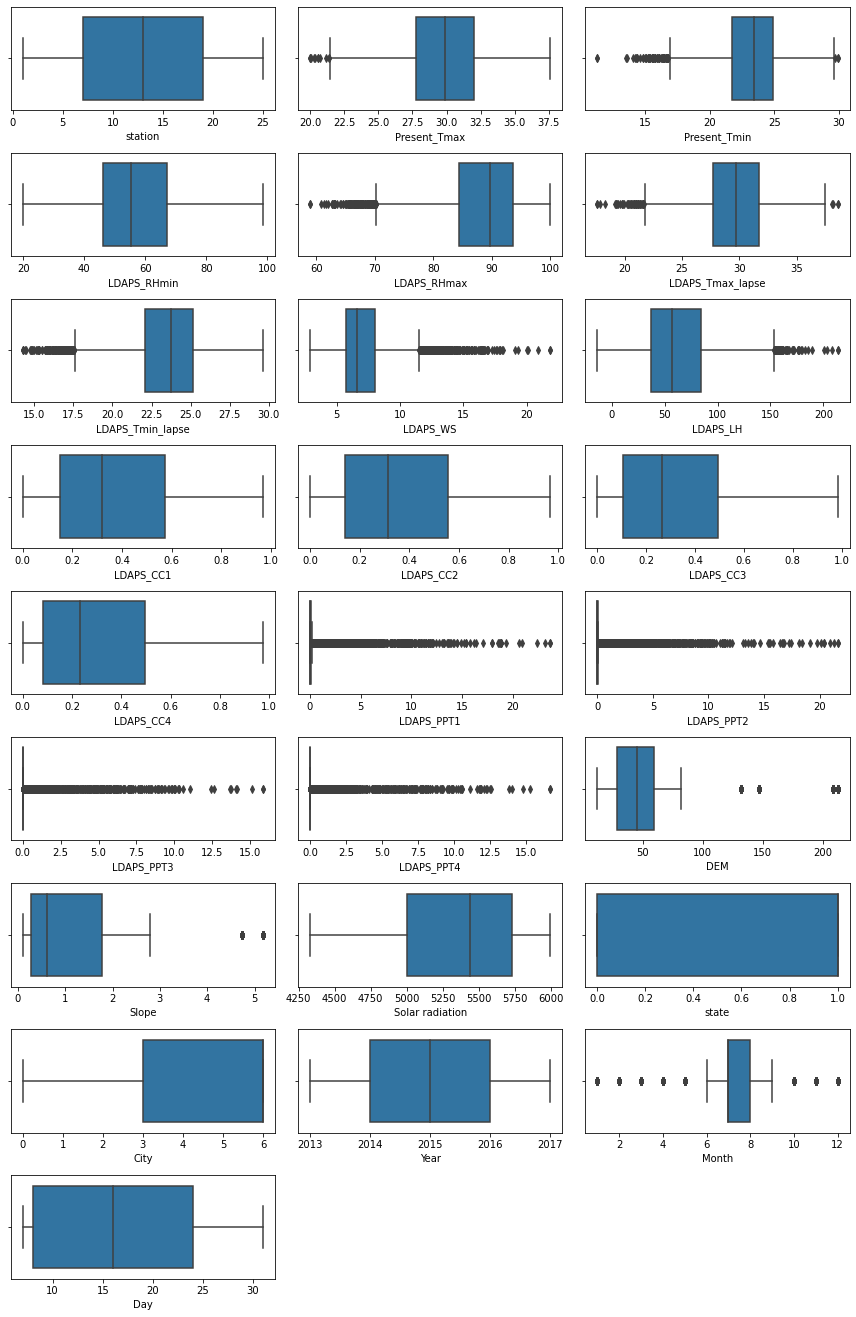

In [43]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(10,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

THIS DATA SET HAS LOTS OF OUTLIERS.
I WILL REMOVE THEM.

In [44]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<percentile[0]]=percentile[0]
  X[col][X[col]>=percentile[1]]=percentile[1]

Removing outliers by percentile method in order to protect data.

#### Checking outliers after removing

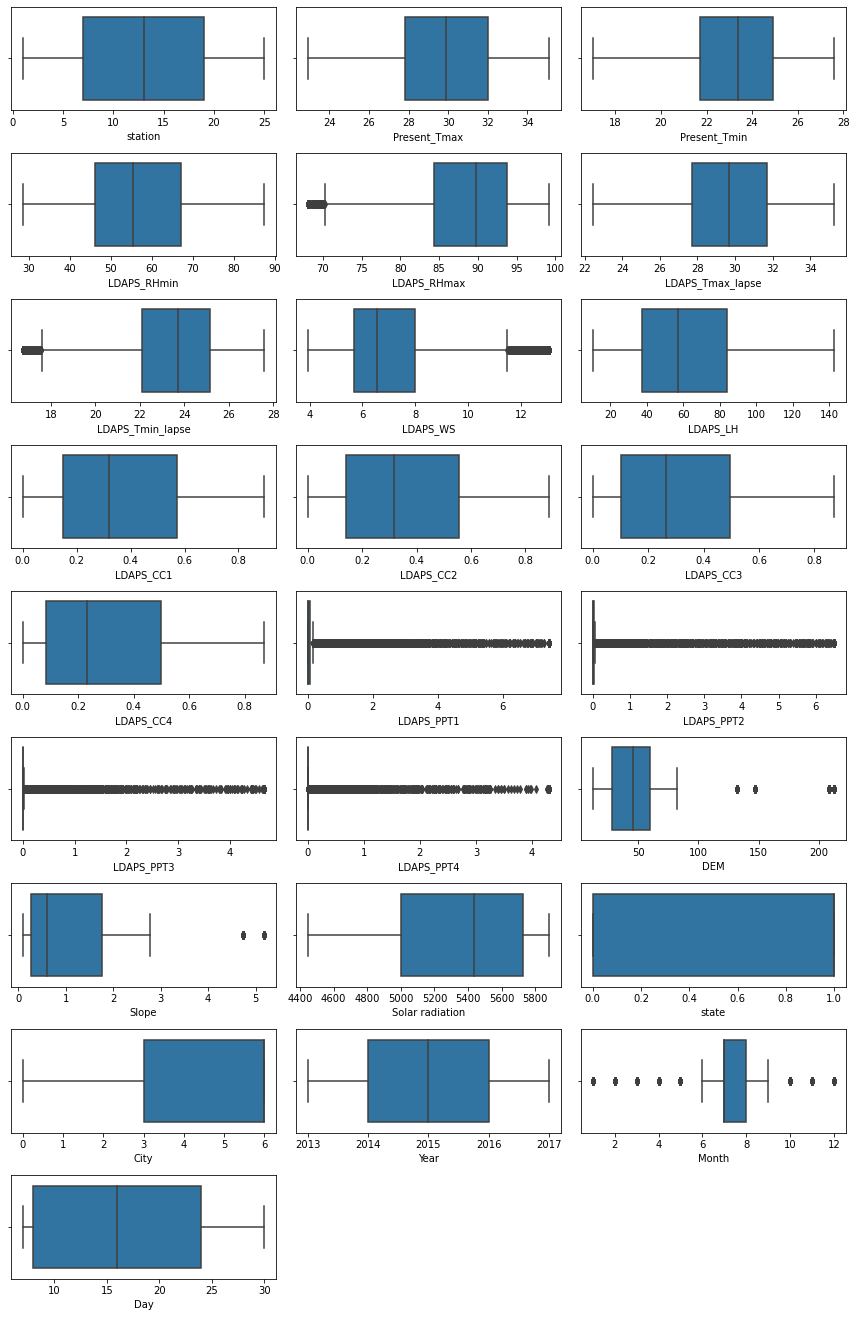

In [45]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(10,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

# Skewness

In [46]:
X.skew()

station             0.000100
Present_Tmax       -0.273084
Present_Tmin       -0.303162
LDAPS_RHmin         0.267646
LDAPS_RHmax        -0.800134
LDAPS_Tmax_lapse   -0.189852
LDAPS_Tmin_lapse   -0.550108
LDAPS_WS            1.114297
LDAPS_LH            0.546838
LDAPS_CC1           0.444996
LDAPS_CC2           0.451103
LDAPS_CC3           0.604213
LDAPS_CC4           0.643015
LDAPS_PPT1          3.534597
LDAPS_PPT2          3.719570
LDAPS_PPT3          4.524134
LDAPS_PPT4          4.543390
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.515178
state              -0.079542
City               -0.967212
Year                0.000365
Month              -0.705303
Day                 0.236834
dtype: float64

MANY COLUMNS HAVE SKEWNESS

In [47]:
import scipy
skew_df=pd.DataFrame(X.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew']=skew_df['Feature'].apply(lambda feature:scipy.stats.skew(X[feature]))
skew_df['Absolute_skew']=skew_df['Skew'].apply(abs)
skew_df['Skewed']=skew_df['Absolute_skew'].apply(lambda x:True if x>=0.5 else False)
skew_df

,Feature,Skew,Absolute_skew,Skewed
0,station,0.000100,0.000100,False
1,Present_Tmax,-0.273031,0.273031,False
2,Present_Tmin,-0.303104,0.303104,False
3,LDAPS_RHmin,0.267594,0.267594,False
4,LDAPS_RHmax,-0.799980,0.799980,True
5,LDAPS_Tmax_lapse,-0.189815,0.189815,False
6,LDAPS_Tmin_lapse,-0.550002,0.550002,True
7,LDAPS_WS,1.114082,1.114082,True
8,LDAPS_LH,0.546733,0.546733,True
9,LDAPS_CC1,0.444910,0.444910,False


#### Removing Skewness

In [48]:
X_new=power_transform(X,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)
X_new.skew()

station            -0.204739
Present_Tmax       -0.049570
Present_Tmin       -0.032870
LDAPS_RHmin        -0.022682
LDAPS_RHmax        -0.121049
LDAPS_Tmax_lapse   -0.026554
LDAPS_Tmin_lapse   -0.041812
LDAPS_WS            0.025665
LDAPS_LH           -0.059849
LDAPS_CC1           0.045410
LDAPS_CC2           0.043534
LDAPS_CC3           0.085732
LDAPS_CC4           0.125332
LDAPS_PPT1          1.392717
LDAPS_PPT2          1.562398
LDAPS_PPT3          1.723208
LDAPS_PPT4          1.934279
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.182605
state              -0.079542
City               -0.507085
Year               -0.000108
Month               0.043843
Day                -0.043510
dtype: float64

# Scaling

In [49]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

# Model

In [51]:
models={
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso()  
}

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ExtraTreesRegressor >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
MEAN SQUARED ERROR 0.645153175776345


MEAN ABSOLUTE ERROR 0.5944802487151017


CVS_SCORE 0.9202628159973166


R2_SCORE 0.917886862162849


RMSE 0.8032142776223198


MODEL PERFORMANCE CURVE


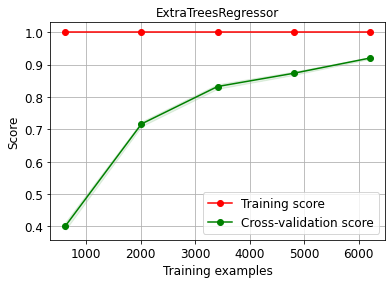

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< RandomForestRegressor >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
MEAN SQUARED ERROR 0.8070755726696632


MEAN ABSOLUTE ERROR 0.6737071708865869


CVS_SCORE 0.9000359944958898


R2_SCORE 0.8982688431837969


RMSE 0.8983738490570967


MODEL PERFORMANCE CURVE


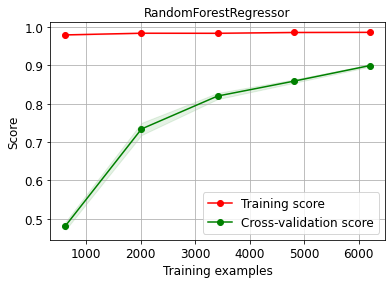

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< LinearRegression >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
MEAN SQUARED ERROR 1.7268974765394423


MEAN ABSOLUTE ERROR 0.9844955007509559


CVS_SCORE 0.7874056483214285


R2_SCORE 0.7910746420116219


RMSE 1.3141147120930663


MODEL PERFORMANCE CURVE


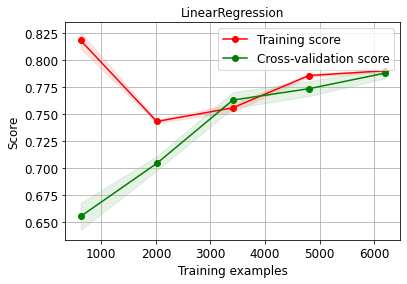

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< DecisionTreeRegressor >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
MEAN SQUARED ERROR 1.899735318345077


MEAN ABSOLUTE ERROR 0.9774167438857748


CVS_SCORE 0.7672895597814592


R2_SCORE 0.7621722029184763


RMSE 1.378308861737846


MODEL PERFORMANCE CURVE


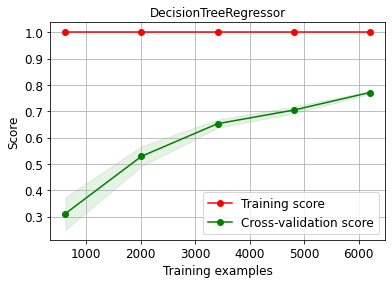

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Lasso >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
MEAN SQUARED ERROR 3.2687984578987974


MEAN ABSOLUTE ERROR 1.399901171094566


CVS_SCORE 0.5959862182782759


R2_SCORE 0.5951436922560768


RMSE 1.807981874328058


MODEL PERFORMANCE CURVE


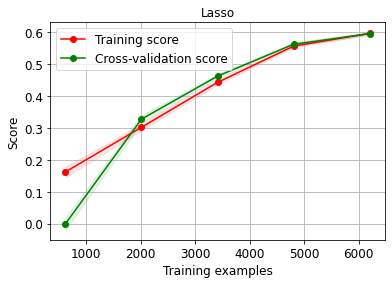

In [52]:
CVS=[]
R2=[]
MSE=[]
MAE=[]
RMSE=[]
NAME=[]
kf=KFold(n_splits=5,shuffle=True)
for name, model in models.items():
  print("<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<",name,">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
  NAME.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  MSE.append(mse)
  print("MEAN SQUARED ERROR",mse)
  mae=mean_absolute_error(y_test,y_pred)
  MAE.append(mae)
  print('\n')
  print("MEAN ABSOLUTE ERROR",mae)
  cvs=cross_val_score(model,X_new,y,scoring='r2',cv=kf).mean()
  CVS.append(cvs)
  print('\n')
  print("CVS_SCORE",cvs)
  r2=r2_score(y_test,y_pred)
  R2.append(r2)
  print('\n')
  print("R2_SCORE",r2)
  rmse=np.sqrt(mse)
  RMSE.append(rmse)
  print('\n')
  print("RMSE",rmse)
  print('\n')
  print('MODEL PERFORMANCE CURVE')
  skplt.estimators.plot_learning_curve(model,X_new,y,cv=kf,scoring='r2',title=name,text_fontsize='large')
  plt.show()

In [53]:
models_result=pd.DataFrame({
    "NAME":NAME,
    "Cross_Val_Score":CVS,
    "R2_score":R2,
    "Mean_squared_error":MSE,
    "Mean_Absolute_Error":MAE,
    "RMSE":RMSE
})

In [54]:

models_result

,NAME,Cross_Val_Score,R2_score,Mean_squared_error,Mean_Absolute_Error,RMSE
0,ExtraTreesRegressor,0.920263,0.917887,0.645153,0.594480,0.803214
1,RandomForestRegressor,0.900036,0.898269,0.807076,0.673707,0.898374
2,LinearRegression,0.787406,0.791075,1.726897,0.984496,1.314115
3,DecisionTreeRegressor,0.767290,0.762172,1.899735,0.977417,1.378309
4,Lasso,0.595986,0.595144,3.268798,1.399901,1.807982


In [55]:
ETree=ExtraTreesRegressor()

# Hyperparameter Tuning

In [56]:
params={
 'bootstrap': [False,True],
 'max_depth': [None,1,2,3],
 'min_samples_leaf': [1,2,3,4],
 'min_samples_split': [2,3,4],
 'n_estimators':[100,200,500]
}

In [57]:
Grid=GridSearchCV(estimator=ETree,param_grid=params,scoring='r2',n_jobs=-1,cv=kf)

In [58]:
Grid.fit(X_new,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [None, 1, 2, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 500]},
             scoring='r2')

In [59]:
Grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [60]:
Grid.best_score_

0.9212292852127761

Accuracy increased by 91.99 to 92.1

In [61]:
Extra=ExtraTreesRegressor(bootstrap= False,
 max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 500)

# Final Model Learning curve

MODEL PERFORMANCE CURVE


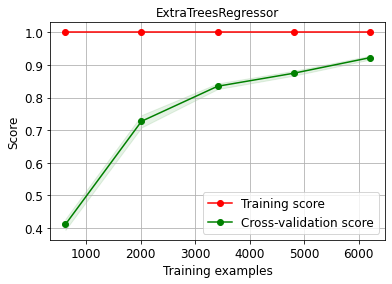

In [62]:
print('MODEL PERFORMANCE CURVE')
skplt.estimators.plot_learning_curve(Extra,X_new,y,cv=kf,scoring='r2',title='ExtraTreesRegressor',text_fontsize='large')
plt.show()

In [63]:
Extra.fit(X_train,y_train)
y_predicted=Extra.predict(X_test)

# Final Metrics

In [64]:
print("Mean Squared Error",mean_squared_error(y_test,y_predicted))
print("Mean Absolute Error",mean_absolute_error(y_test,y_predicted))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predicted)))
print("R2 Score",r2_score(y_test,y_predicted))

Mean Squared Error 0.6333769416273196
Mean Absolute Error 0.5878250339680613
RMSE 0.7958498235391647
R2 Score 0.919403468228025


# Saving Model

In [65]:
import joblib
joblib.dump(Grid,"Temperature_prediction_model.obj")

['Temperature_prediction_model.obj']

# THANKYOU